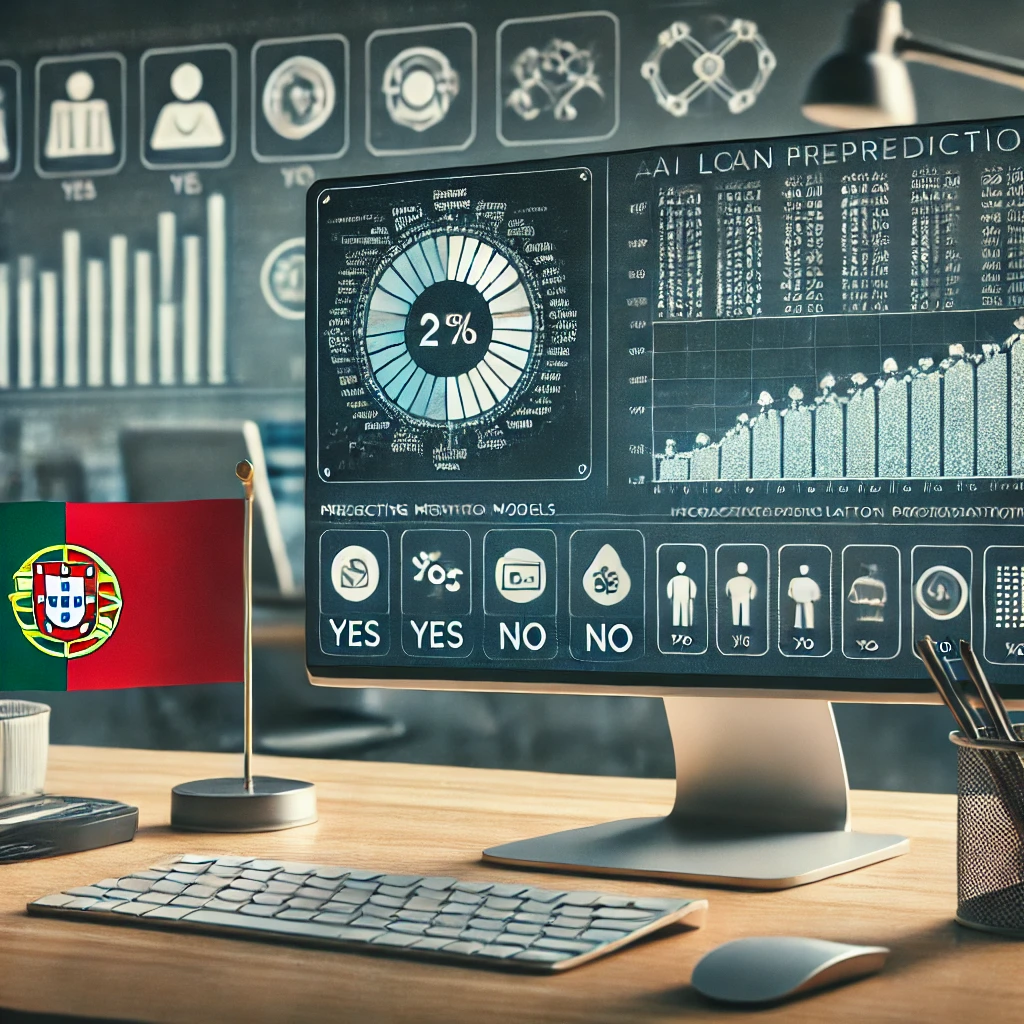

# Nitin Salve
# salve.nitin2012@gmail.com 

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.

Task3:-Suggestions to the Bank market team to make  customers  buy the product.



# Imorting Necessary Libraries¶

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
#pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
data=pd.read_csv('bank-additional-full.csv',delimiter=';')

 # Data Overview

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [12]:
data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16309,27,blue-collar,single,basic.6y,no,yes,yes,cellular,jul,tue,246,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
28463,42,services,single,basic.6y,no,yes,yes,cellular,apr,tue,213,3,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
640,49,housemaid,married,basic.4y,unknown,unknown,unknown,telephone,may,tue,524,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15696,28,blue-collar,married,basic.4y,no,yes,no,cellular,jul,mon,113,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
13796,48,technician,married,basic.6y,no,no,no,cellular,jul,thu,171,5,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


In [14]:
data.shape

(41188, 21)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


 ## rechecking missing value

In [21]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

rechecking done no missing value in data

 # Exploratory Data Analysis

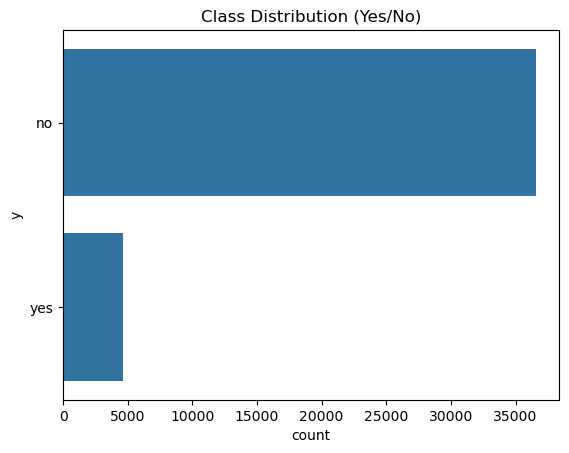

In [25]:
sns.countplot(data['y'])
plt.title('Class Distribution (Yes/No)')
plt.show()

From the above Picture, We can say that the data is imbalanced

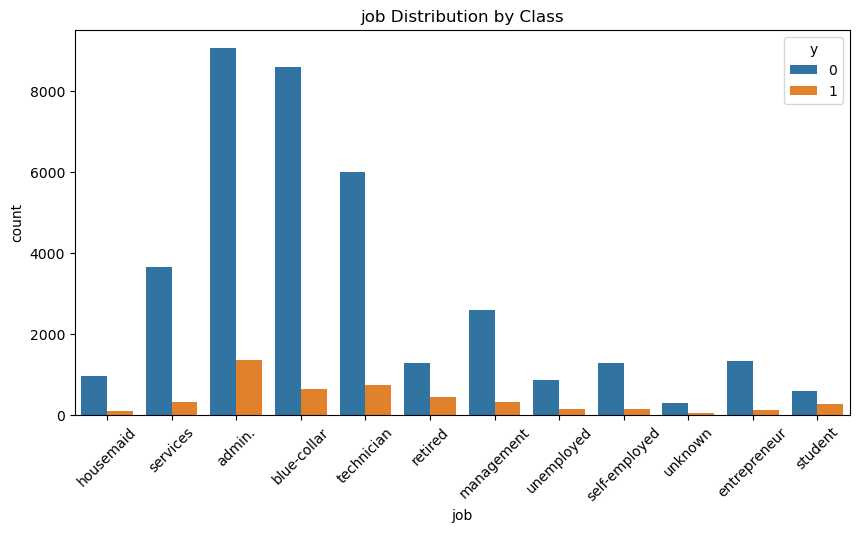

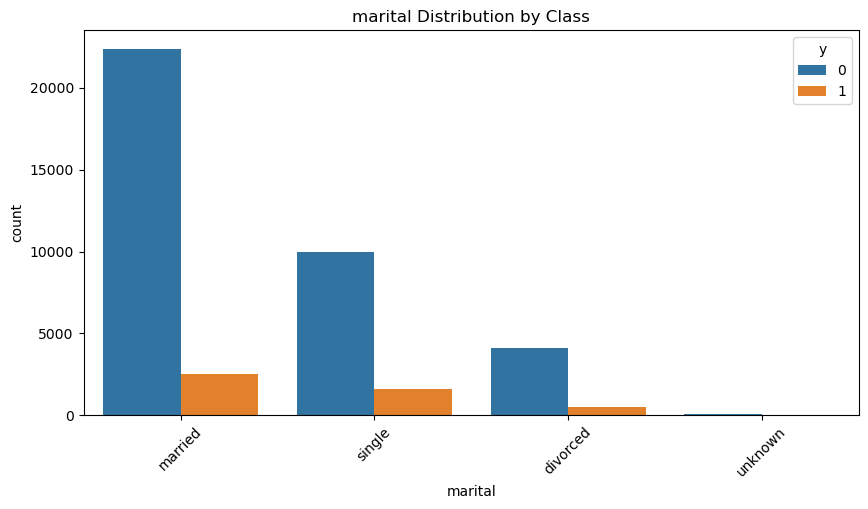

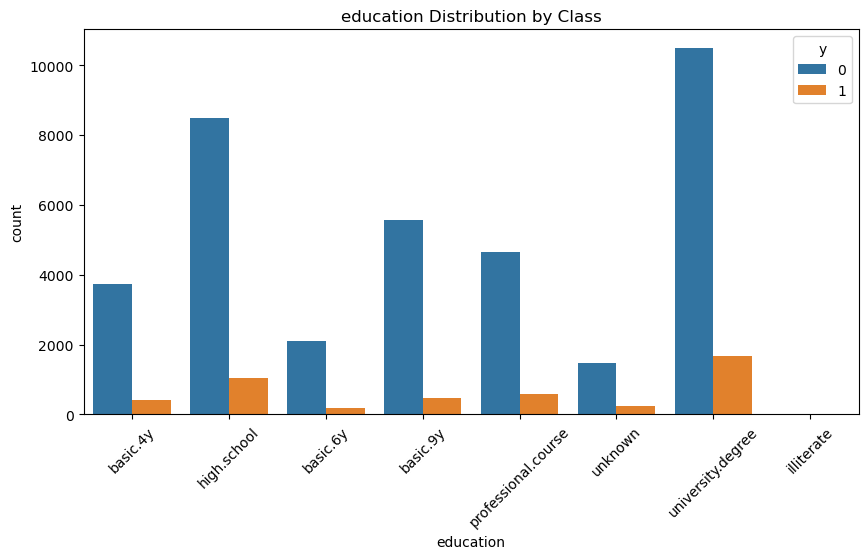

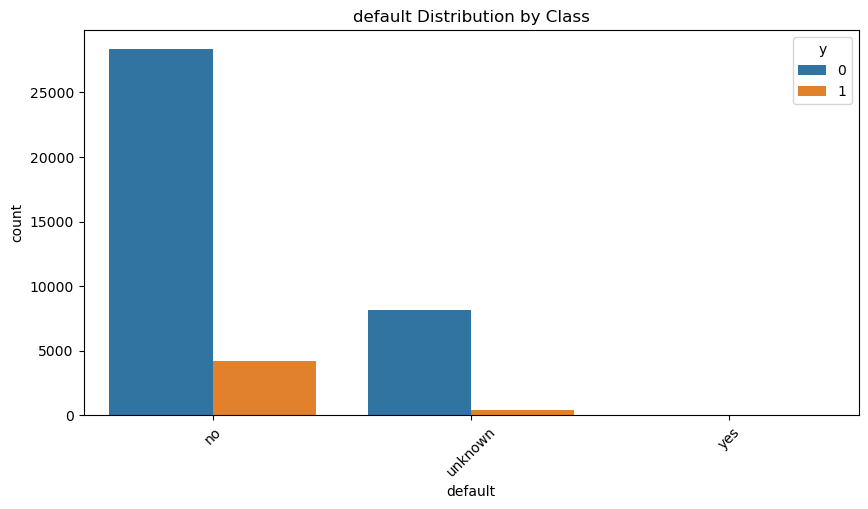

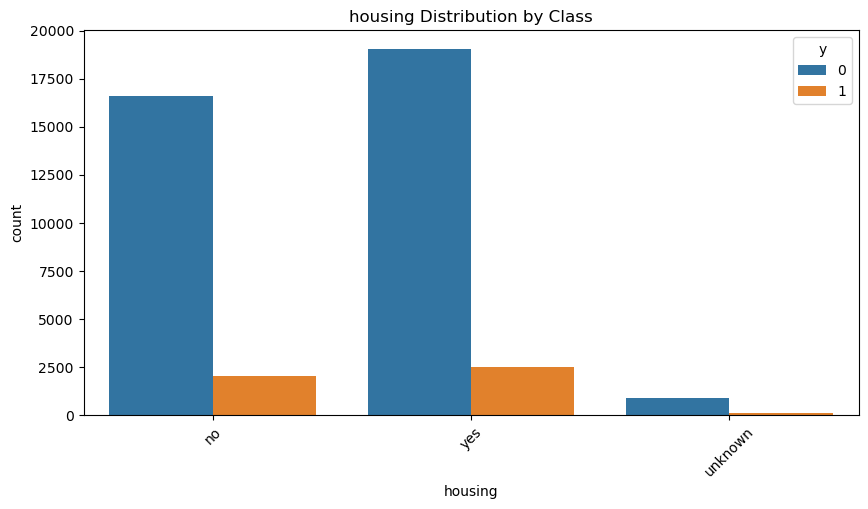

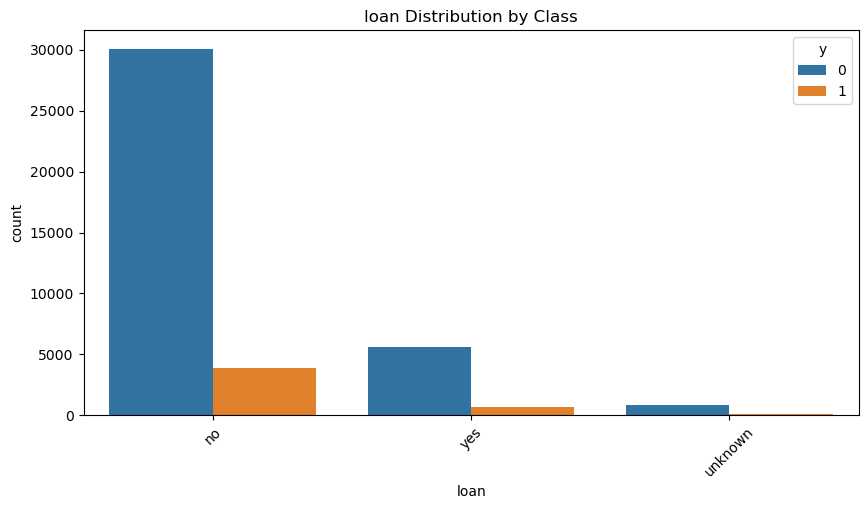

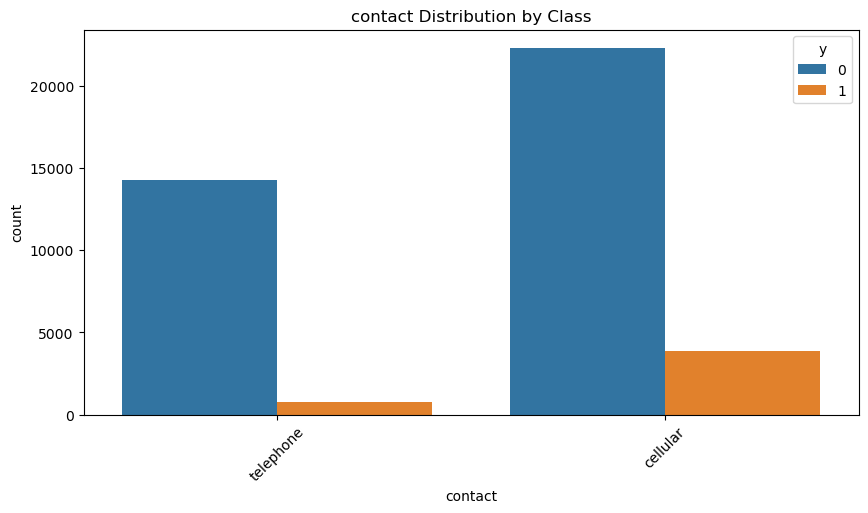

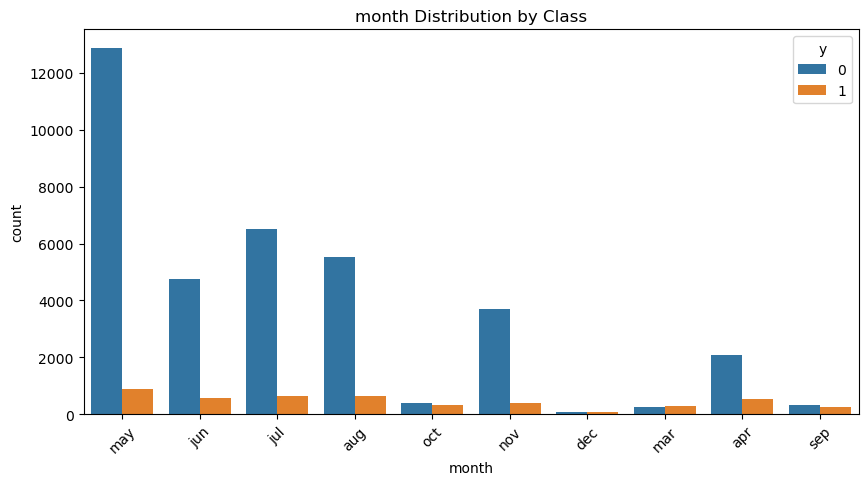

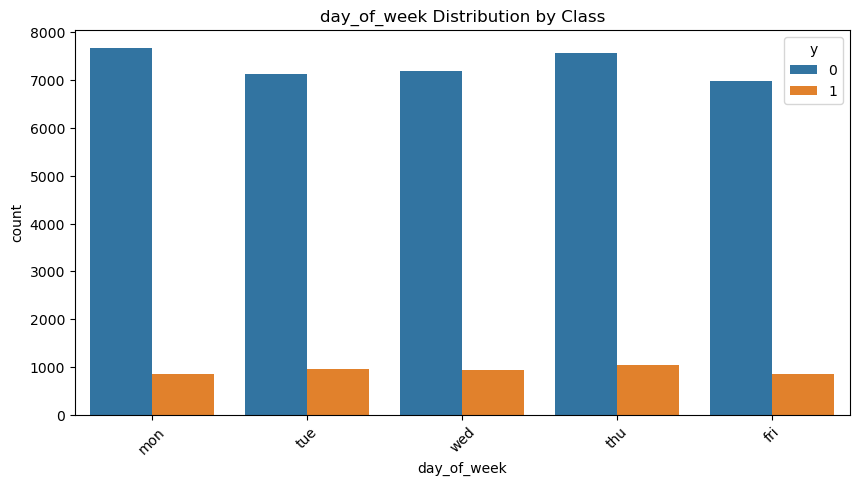

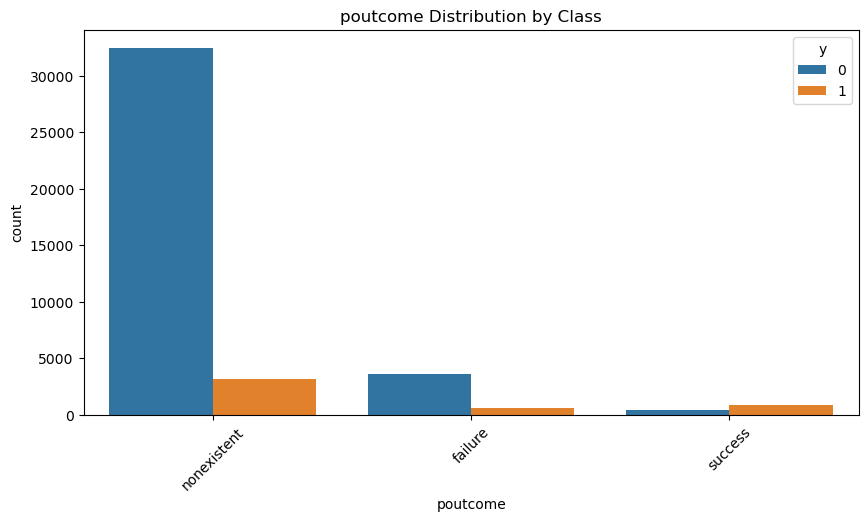

In [15]:
# Plotting categorical features
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=data[column], hue=data['y'])
    plt.title(f'{column} Distribution by Class')
    plt.xticks(rotation=45)
    plt.show()

job-   
*Admin and bluecaller or technician gets most of the maximum loan facility   
*students and housemaid  getless loan facility becase they are not earning person

marital-  
*married persons get more loan and productd facility from bank    
*divorced person are not get maximum facility from bank becase of any police complaint case issue and unimployemts from job  

education-   
*university degree persons have higer chance to get maximum facility from banks   
*data shows high school person is more get facility from bank and professional cousrce percon is less chance than high school person to get any facility

contact-  
*cellular users have most facility from bank

 # Data Preprocessing

 ## Encoding   
Convert categorical variables to numerical values

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [8]:
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

In [17]:
for column in categorical_columns:
    if column != 'y':
        data[column] = le.fit_transform(data[column])

In [19]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [13]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


 ## Checking for outliers using boxplots

<Axes: xlabel='y', ylabel='duration'>

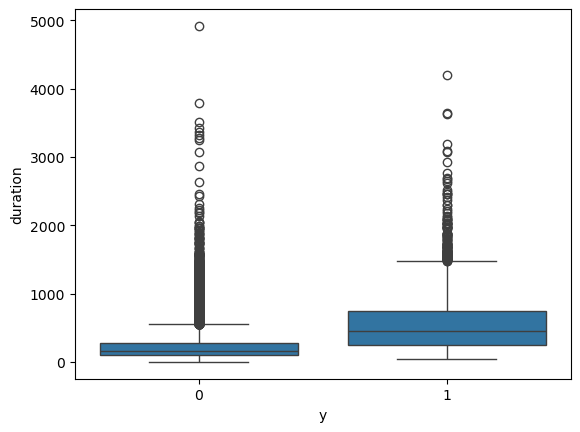

In [47]:
sns.boxplot(x='y', y='duration', data=data)

<Axes: xlabel='y', ylabel='education'>

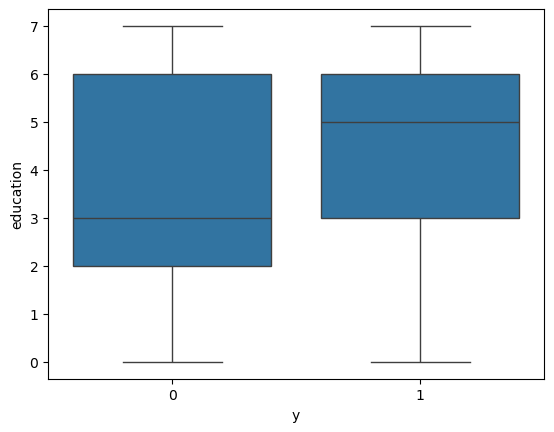

In [49]:
sns.boxplot(x='y', y='education', data=data)

<Axes: xlabel='y', ylabel='housing'>

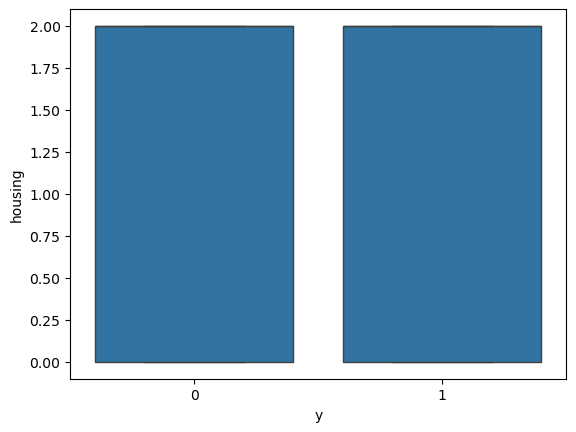

In [51]:
sns.boxplot(x='y', y='housing', data=data)

<Axes: xlabel='y', ylabel='age'>

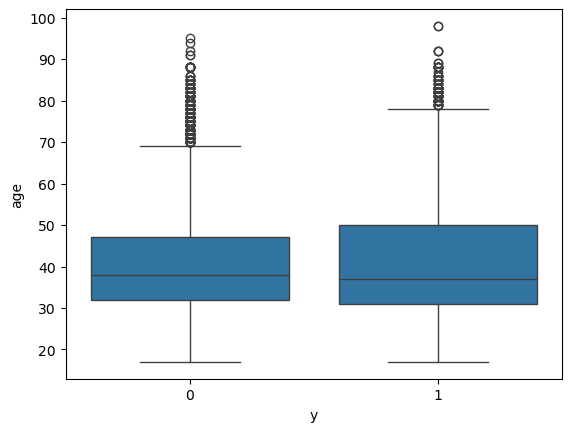

In [53]:
sns.boxplot(x='y',y='age',data=data)

<Axes: xlabel='y', ylabel='job'>

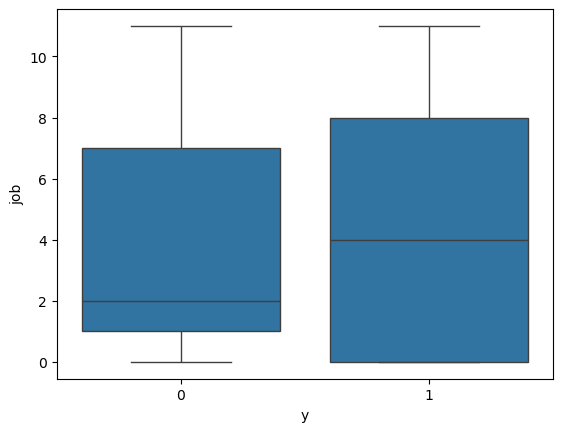

In [55]:
sns.boxplot(x='y',y='job',data=data)

<Axes: xlabel='y', ylabel='campaign'>

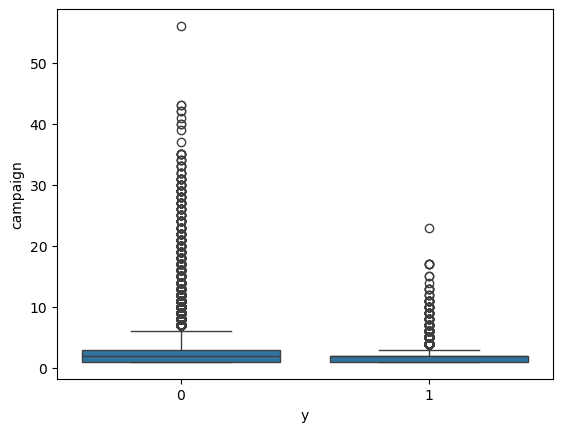

In [57]:
sns.boxplot(x='y',y='campaign',data=data)

 # Removing outliers

In [21]:
def remove_outliers(data, column , minimum, maximum):
    col_values = data[column].values
    data[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return data

In [23]:
min_val=  data['duration'].min()
max_val = 1500
data = remove_outliers(data, column='duration', minimum=min_val, maximum=max_val)

min_val=data['age'].min()
max_val=80
data= remove_outliers(data, column='age', minimum=min_val, maximum=max_val)

min_val =data['campaign'].min()
max_val= 6
data= remove_outliers(data, column='campaign', minimum=min_val, maximum=max_val)

## Dropping less meaningful columns

<Axes: >

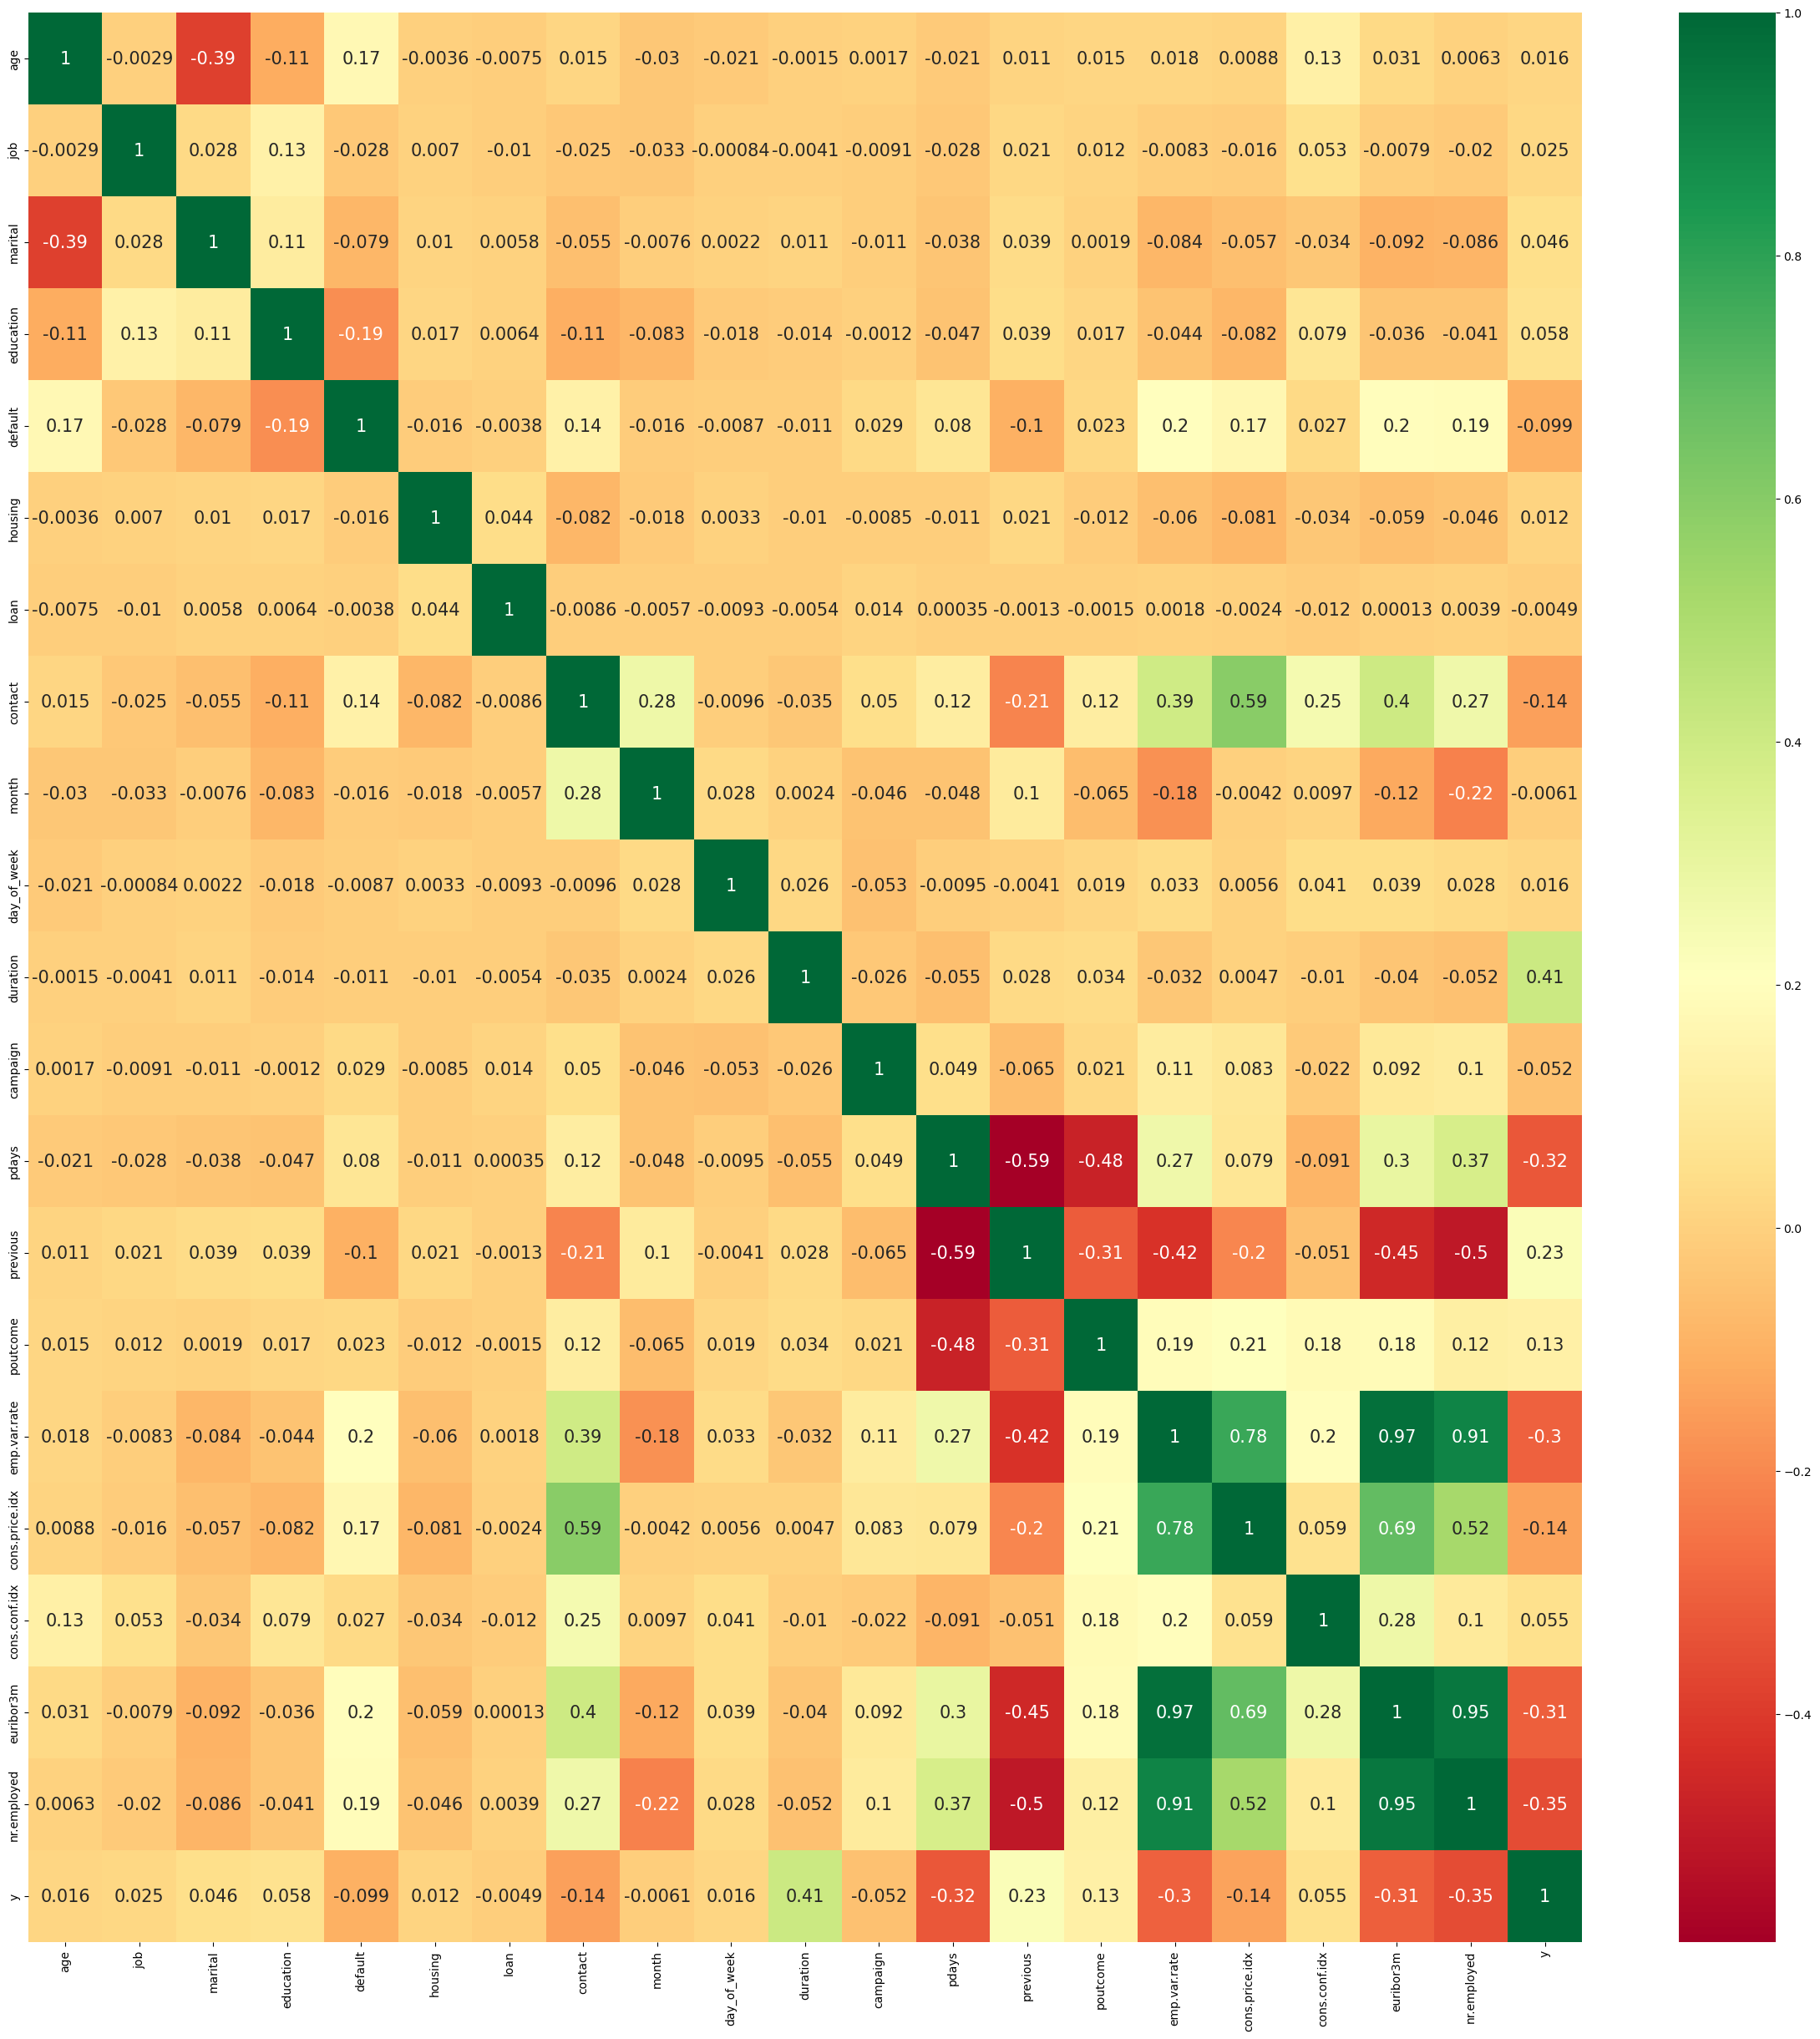

In [65]:
##Checking correlation
plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

<Axes: xlabel='education', ylabel='count'>

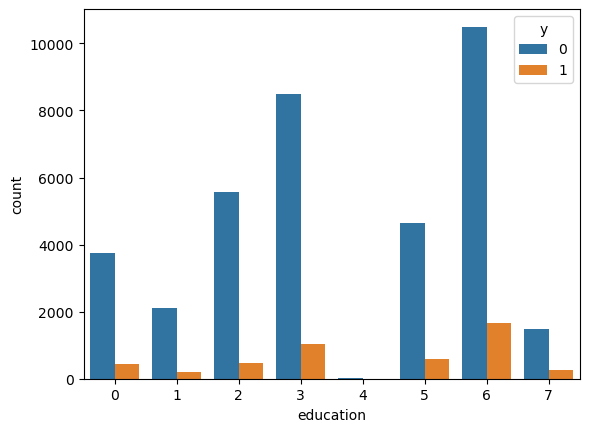

In [66]:
sns.countplot(x='education',hue='y',data=data)

<Axes: xlabel='default', ylabel='count'>

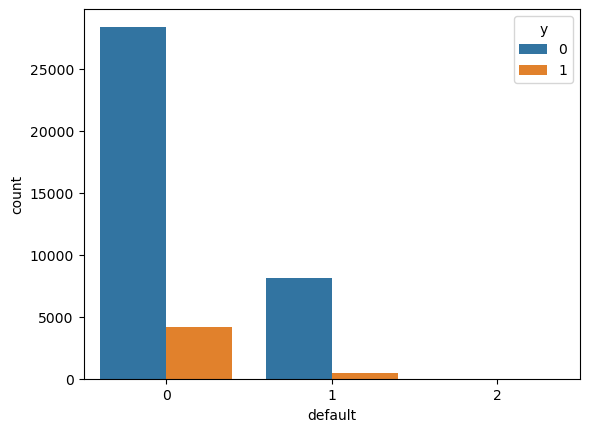

In [67]:
sns.countplot(x='default',hue='y',data=data)

this column skewed to 0. So We can drop .

In [25]:
data = data.drop('default',axis=1)

In [74]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3,1,0,0,0,1,6,1,261.0,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,7,1,3,0,0,1,6,1,149.0,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,7,1,3,2,0,1,6,1,226.0,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,0,1,1,0,0,1,6,1,151.0,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,7,1,3,0,2,1,6,1,307.0,1.0,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


<Axes: xlabel='loan', ylabel='count'>

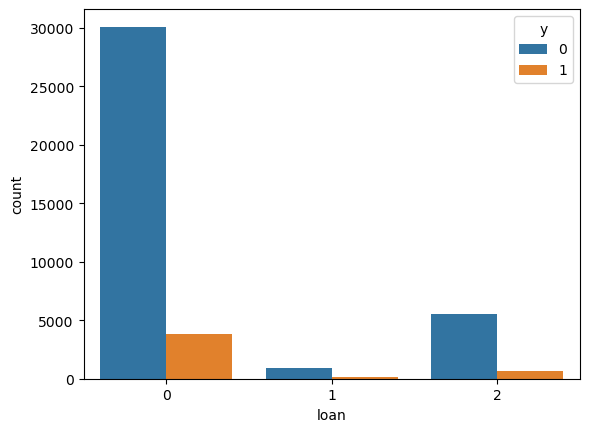

In [76]:
sns.countplot(x='loan',hue='y',data=data)

## Splitting the dataset

In [8]:
X = data.drop('y', axis=1)
y = data['y']

NameError: name 'data' is not defined

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

NameError: name 'X' is not defined

##  scaling Standardize features

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Models

# 1 Logistic  Regression 

In [185]:
from sklearn.linear_model import LogisticRegression

In [187]:
lr=LogisticRegression()

In [189]:
lr.fit(X_train,y_train)  ## training

LogisticRegression()

In [191]:
# Prediction
y_pred=lr.predict(X_test)

In [193]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [195]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[7106  197]
 [ 544  391]]


In [197]:
recall=recall_score(y_test,y_pred)
recall

0.41818181818181815

In [199]:
precision=precision_score(y_test,y_pred)
precision

0.6649659863945578

In [201]:
f1score=f1_score(y_test,y_pred)
f1score

0.5134602757715037

In [203]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



logistic regression showing accuracy 91% 

# 2.decision Tree classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
dc=DecisionTreeClassifier()

In [211]:
dc.fit(X_train,y_train)
y_pred_dc=dc.predict(X_test)

In [213]:
y_pred_dc

array([0, 0, 0, ..., 0, 1, 0])

In [215]:
y_train_pred=dc.predict(X_train)
y_train_pred

array([0, 0, 0, ..., 1, 0, 0])

In [217]:
# evaluating model
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [219]:
#traing model
y_train_pred=dc.predict(X_train)
acc_train=accuracy_score(y_train,y_train_pred)
acc_train

1.0

In [221]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29245
           1       1.00      1.00      1.00      3705

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



predicting testing data to check test performance

In [223]:
test_acc=f1_score(y_test,y_pred_dc)
test_acc

0.5099685204616999

In [225]:
print(classification_report(y_test,y_pred_dc))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7303
           1       0.50      0.52      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



 ## now dicision tree clasifier show accuracy 89%

# hyperparameter tuning for decision tree classifier

In [227]:
from sklearn.model_selection import GridSearchCV

In [257]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],       # Function to measure the quality of a split
    'splitter': ['best', 'random'],         # Strategy used to choose the split at each node
    'max_depth': [5, 10, 15, 20, None],     # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10, 15],     # Minimum number of samples required at each leaf node
    'max_features': [ 'sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 15, 'min_samples_split': 2, 'splitter': 'best'}


In [259]:
dt1=DecisionTreeClassifier(**best_params)

In [261]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=15)

In [263]:
# Make predictions with the best model
y_pred_dt1 = best_model.predict(X_test)

In [265]:
# Evaluate model
print("Classification Report:\n", classification_report(y_test, y_pred_dt1))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.66      0.53      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238



### after hyperparameter tunning accuracy increse and show 92%

 # 3. RandomForest Classifier

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [269]:
rc=RandomForestClassifier()

In [271]:
rc.fit(X_train,y_train)
y_pred_rc=rc.predict(X_test)

In [273]:
print(classification_report(y_test,y_pred_rc))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



 # Hyperparameter Tuning on RandomForestClassifier 

In [190]:
from sklearn.model_selection import RandomizedSearchCV

In [192]:
# Define the parameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}


# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf, scoring='f1',param_distributions=random_grid, n_iter=10, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params}")##printing  best parameters
 



Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [194]:
rf2 = RandomForestClassifier(**rf_best_params)#passing best parameter to randomforest
rf2.fit(X_train, y_train)#training 
y_pred_rf2=rf2.predict(X_test)#testing

In [196]:
print(classification_report(y_test,y_pred_rf2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.77      8238
weighted avg       0.91      0.91      0.91      8238



 # After hyperparameter tumming model show 91% accuracy

# 4. Gradient Boosting Classifier

In [275]:
from sklearn.ensemble import GradientBoostingClassifier

In [277]:
gc=GradientBoostingClassifier()

In [279]:
gc.fit(X_train,y_train)

GradientBoostingClassifier()

In [281]:
y_pred_gc=gc.predict(X_test)

In [283]:
print(classification_report(y_test,y_pred_gc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.67      0.51      0.58       935

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



### gradient boosting showing 92% accuracy

# 5. Support Vector Classifier

In [285]:
from sklearn.svm import SVC

In [287]:
sv=SVC()
sv.fit(X_train, y_train)
y_pred_sv=sv.predict(X_test)

In [289]:
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.67      0.37      0.47       935

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.89      0.91      0.90      8238



In [118]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sv,X_train,y_train,cv=3,scoring='f1')
print(scores)

[0.45425532 0.45747491 0.48559232]


### support vector machine shows 91% accuracy

# 6.Neural Network : MLPClassifier

In [291]:
# model creation
from sklearn.neural_network import MLPClassifier

In [132]:
mpl = MLPClassifier( hidden_layer_sizes=(50,3),
                       learning_rate_init=0.1,
                       max_iter=300,
                       random_state=2)

In [134]:
mpl.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 3), learning_rate_init=0.1, max_iter=300,
              random_state=2)

In [138]:
y_predict_proba = mpl.predict_proba(X_test)

In [142]:
# bability of class
y_predict = mpl.predict(X_test)
y_train_predict = mpl.predict(X_train)


In [144]:
# Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_predict))

Train accuracy : 0.9113201820940819
Test accuracy : 0.9082301529497451


In [146]:
# getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7303
           1       0.68      0.36      0.47       935

    accuracy                           0.91      8238
   macro avg       0.80      0.67      0.71      8238
weighted avg       0.90      0.91      0.90      8238



### MPLclassifier shows 91% acuuracy

# Model Comparison Report

In [310]:
print('Logostic Rgression :\n ', classification_report(y_test,y_pred))
print("Descision tree classfier after tunning:\n", classification_report(y_test, y_pred_dt1))
print("Random Forest classifier after hyperparameter tunning :\n " ,classification_report(y_test,y_pred_rc))
print("Gradient Boost Classifier :\n",classification_report(y_test,y_pred_gc))
print("Support vector Classifier :\n",classification_report(y_test,y_pred_sv))
print("MLPclassifier :\n",classification_report(y_test,y_predict))

Logostic Rgression :
                precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.42      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Descision tree classfier after tunning:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.66      0.53      0.59       935

    accuracy                           0.92      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.91      0.92      0.91      8238

Random Forest classifier after hyperparameter tunning :
                precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.64      0.51      0.57       935

    accuracy                           0.91      8238
   mac

# we are selecting Gradient Boost Classifier because there precision,recall,f1-score are good and better than other models

# Suggestions for Bank Marketing Team

 ### Suggestions:

##### Based on the analysis:
1. Age group segments that show higher purchase rates.
2. Specific education and job types that are associated with positive responses.
3. Seasonal campaigns may benefit targeting customers based on contact month.

Incentivize customers with a history of contact with additional offers to increase conversion.

# Report on Challenges and Solutions

#### Challenges included:
1. Handling categorical data - Used label encoding for simplicity.
2. Class imbalance - Balanced classes could enhance accuracy, so consider resampling or using weighted loss functions.
3. Model selection - Evaluated multiple models to identify the best-performing model based on AUC and accuracy.

#### Other Notes:
- Additional feature engineering could improve performance.
- Data was already relatively clean with minimal preprocessing requirements.